In [1]:
import plotly.express as px
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from dash import Dash, dcc, html, Input, Output
import io
import base64

In [2]:
processed_data = pd.read_csv("../data/03_Processed/02_ProcessedData.csv")

In [3]:
processed_data

,ID,Uczestnictwo,Programming: R,Programming: Python,Programming: Bash,Version Control: GIT,Containers: Docker,"CLI: (np. Bash, PowerShell, CMD)","Front End: (HTML, JavaScript, CSS)",Databases: SQL,...,Współpraca z administracją UEW,FinTech,HealthTech,FashionTech,E-commerce,SportTech,Non-profit,PropTech (nieruchomości),Cybersecurity,HR
0,1,Projekt+organizacja,2.0,3.0,3.0,4.0,3.0,4.0,4.0,3.0,...,2.0,3.0,2.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0
1,2,Projekt,3.0,3.0,1.0,3.0,2.0,2.0,1.0,4.0,...,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,3,Projekt,0.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0,...,2.0,3.0,0.0,0.0,2.0,0.0,1.0,2.0,0.0,0.0
3,4,Projekt+organizacja,3.0,3.0,2.0,2.0,2.0,2.0,1.0,3.0,...,3.0,3.0,2.0,2.0,3.0,1.0,3.0,1.0,2.0,1.0
4,5,Projekt+organizacja,3.0,3.0,2.0,2.0,2.0,2.0,1.0,3.0,...,3.0,3.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0
5,6,Projekt+organizacja,1.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,...,3.0,4.0,2.0,1.0,2.0,1.0,2.0,3.0,2.0,1.0
6,7,Projekt,2.0,3.0,2.0,2.0,2.0,2.0,1.0,3.0,...,1.0,2.0,0.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0
7,9,Projekt,3.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,...,1.0,1.0,1.0,0.0,2.0,0.0,1.0,0.0,1.0,1.0
8,10,Projekt,1.0,3.0,2.0,2.0,2.0,2.0,2.0,4.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
9,11,Projekt,2.0,2.0,1.0,2.0,0.0,2.0,1.0,2.0,...,0.0,3.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0


In [4]:
processed_data.describe()

,ID,Programming: R,Programming: Python,Programming: Bash,Version Control: GIT,Containers: Docker,"CLI: (np. Bash, PowerShell, CMD)","Front End: (HTML, JavaScript, CSS)",Databases: SQL,Databases: NoSQL,...,Współpraca z administracją UEW,FinTech,HealthTech,FashionTech,E-commerce,SportTech,Non-profit,PropTech (nieruchomości),Cybersecurity,HR
count,60.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,32.400000,1.847458,2.593220,1.305085,1.983051,1.372881,1.457627,1.508475,2.847458,1.915254,...,1.400000,1.733333,1.483333,1.050000,1.633333,1.216667,1.333333,1.233333,1.416667,1.083333
std,18.876225,1.047387,0.697746,1.192711,1.252467,1.230339,1.222237,1.072748,0.738441,0.836415,...,0.960226,1.147830,1.016669,0.909926,0.956098,0.922261,0.985775,0.908839,0.869281,0.869281
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.750000,1.000000,2.000000,0.000000,1.500000,0.000000,0.000000,1.000000,2.000000,2.000000,...,1.000000,1.000000,0.750000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.750000
50%,31.500000,2.000000,3.000000,1.000000,2.000000,2.000000,2.000000,1.000000,3.000000,2.000000,...,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000
75%,48.250000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,...,2.000000,2.250000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,67.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,4.000000,3.000000,3.000000,4.000000


In [5]:
processed_data.columns

Index(['ID', 'Uczestnictwo', 'Programming: R', 'Programming: Python',
       'Programming: Bash', 'Version Control: GIT', 'Containers: Docker',
       'CLI: (np. Bash, PowerShell, CMD)',
       'Front End: (HTML, JavaScript, CSS)', 'Databases: SQL',
       'Databases: NoSQL', 'Cloud: Azure', 'Cloud: AWS', 'Cloud: GPC',
       'BI: PowerBI', 'BI: Tableau', 'Area: Time Series',
       'Area: Classical ML (Clustering, Regression, Classification)',
       'Area: NLP', 'Area: Computer Vision', 'Project Management',
       'Promocja w Social Media', 'Ux/Ui', 'Projektowanie graficzne',
       'Nawiązywanie Relacji z Biznesem', 'Nawiązywanie Relacji z naukowcami',
       'Pozyskiwanie finansowania', 'Współpraca z administracją UEW',
       'FinTech', 'HealthTech', 'FashionTech', 'E-commerce', 'SportTech',
       'Non-profit', 'PropTech (nieruchomości)', 'Cybersecurity', 'HR'],
      dtype='object')

In [6]:
selected_columns = processed_data[['Programming: R', 'Programming: Python',
       'Programming: Bash', 'Version Control: GIT', 'Containers: Docker',
       'CLI: (np. Bash, PowerShell, CMD)',
       'Front End: (HTML, JavaScript, CSS)', 'Databases: SQL',
       'Databases: NoSQL', 'Cloud: Azure', 'Cloud: AWS', 'Cloud: GPC',
       'BI: PowerBI', 'BI: Tableau', 'Area: Time Series',
       'Area: Classical ML (Clustering, Regression, Classification)',
       'Area: NLP', 'Area: Computer Vision', 'Project Management',
       'Promocja w Social Media', 'Ux/Ui', 'Projektowanie graficzne',
       'Nawiązywanie Relacji z Biznesem', 'Nawiązywanie Relacji z naukowcami',
       'Pozyskiwanie finansowania', 'Współpraca z administracją UEW',
       'FinTech', 'HealthTech', 'FashionTech', 'E-commerce', 'SportTech',
       'Non-profit', 'PropTech (nieruchomości)', 'Cybersecurity', 'HR']]

/var/folders/g2/yfkj5x354bg2wg_5t6jzg9_80000gn/T/ipykernel_97977/1088205858.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  ax.figure.show()


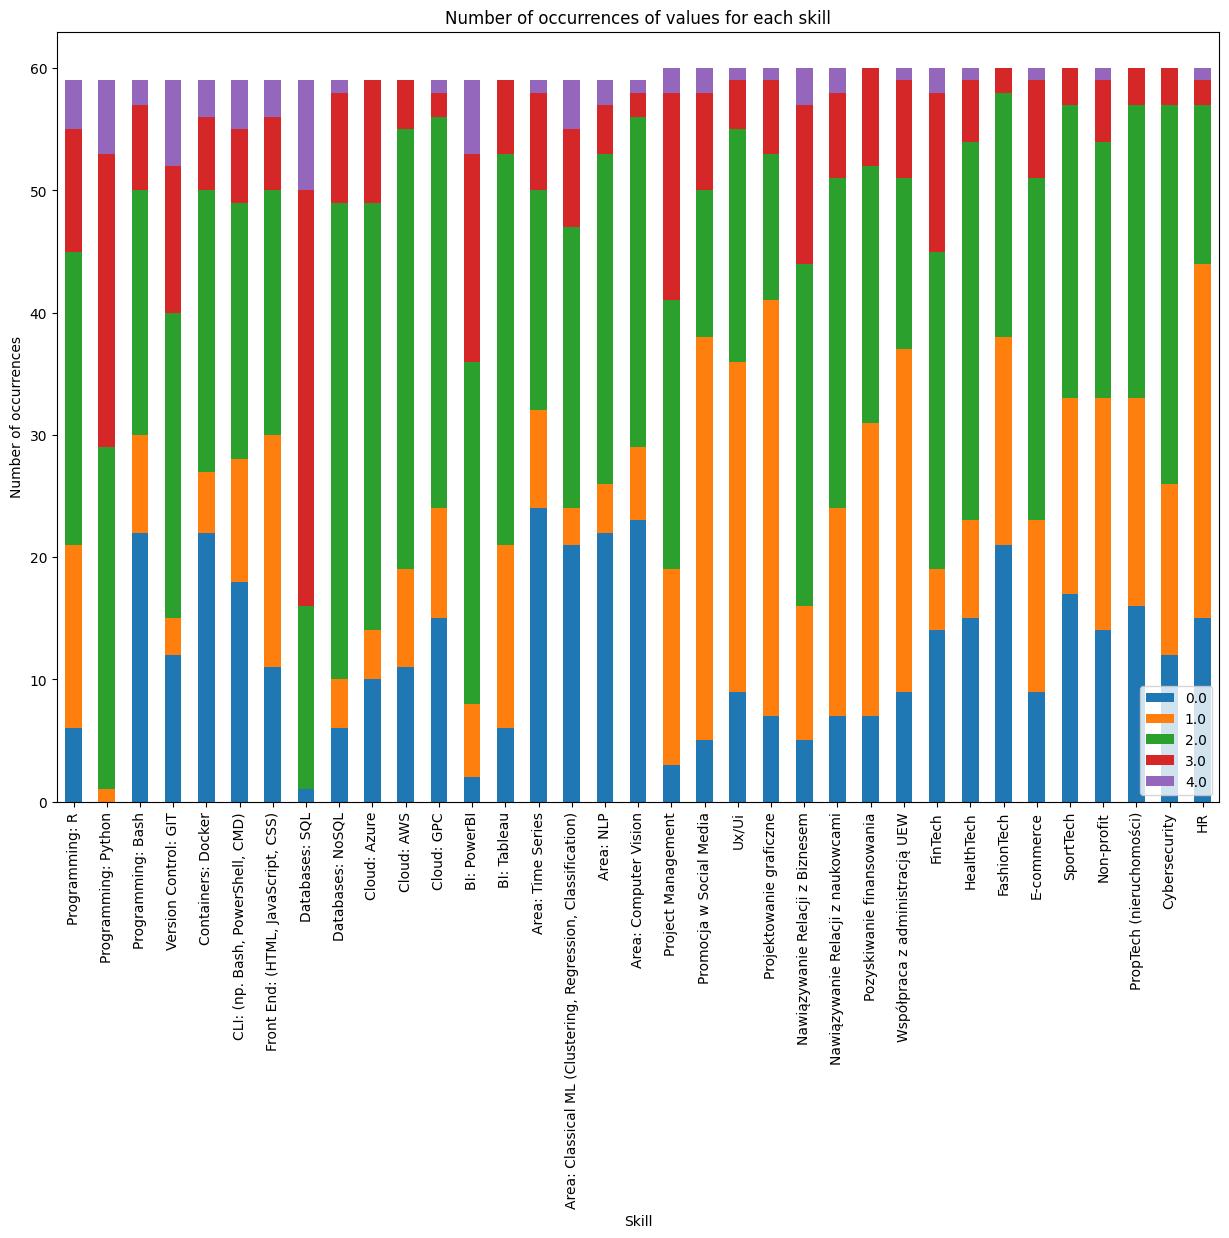

In [7]:
value_counts = selected_columns.apply(lambda x: x.value_counts()).T
ax = value_counts.plot(kind='bar', stacked=True, figsize=(15, 10), title='Number of occurrences of values for each skill')
ax.set_xlabel('Skill')
ax.set_ylabel('Number of occurrences')
ax.figure.savefig('../figures/03_NumberOfOccurrences.png', dpi=300,bbox_inches='tight')
ax.figure.show()

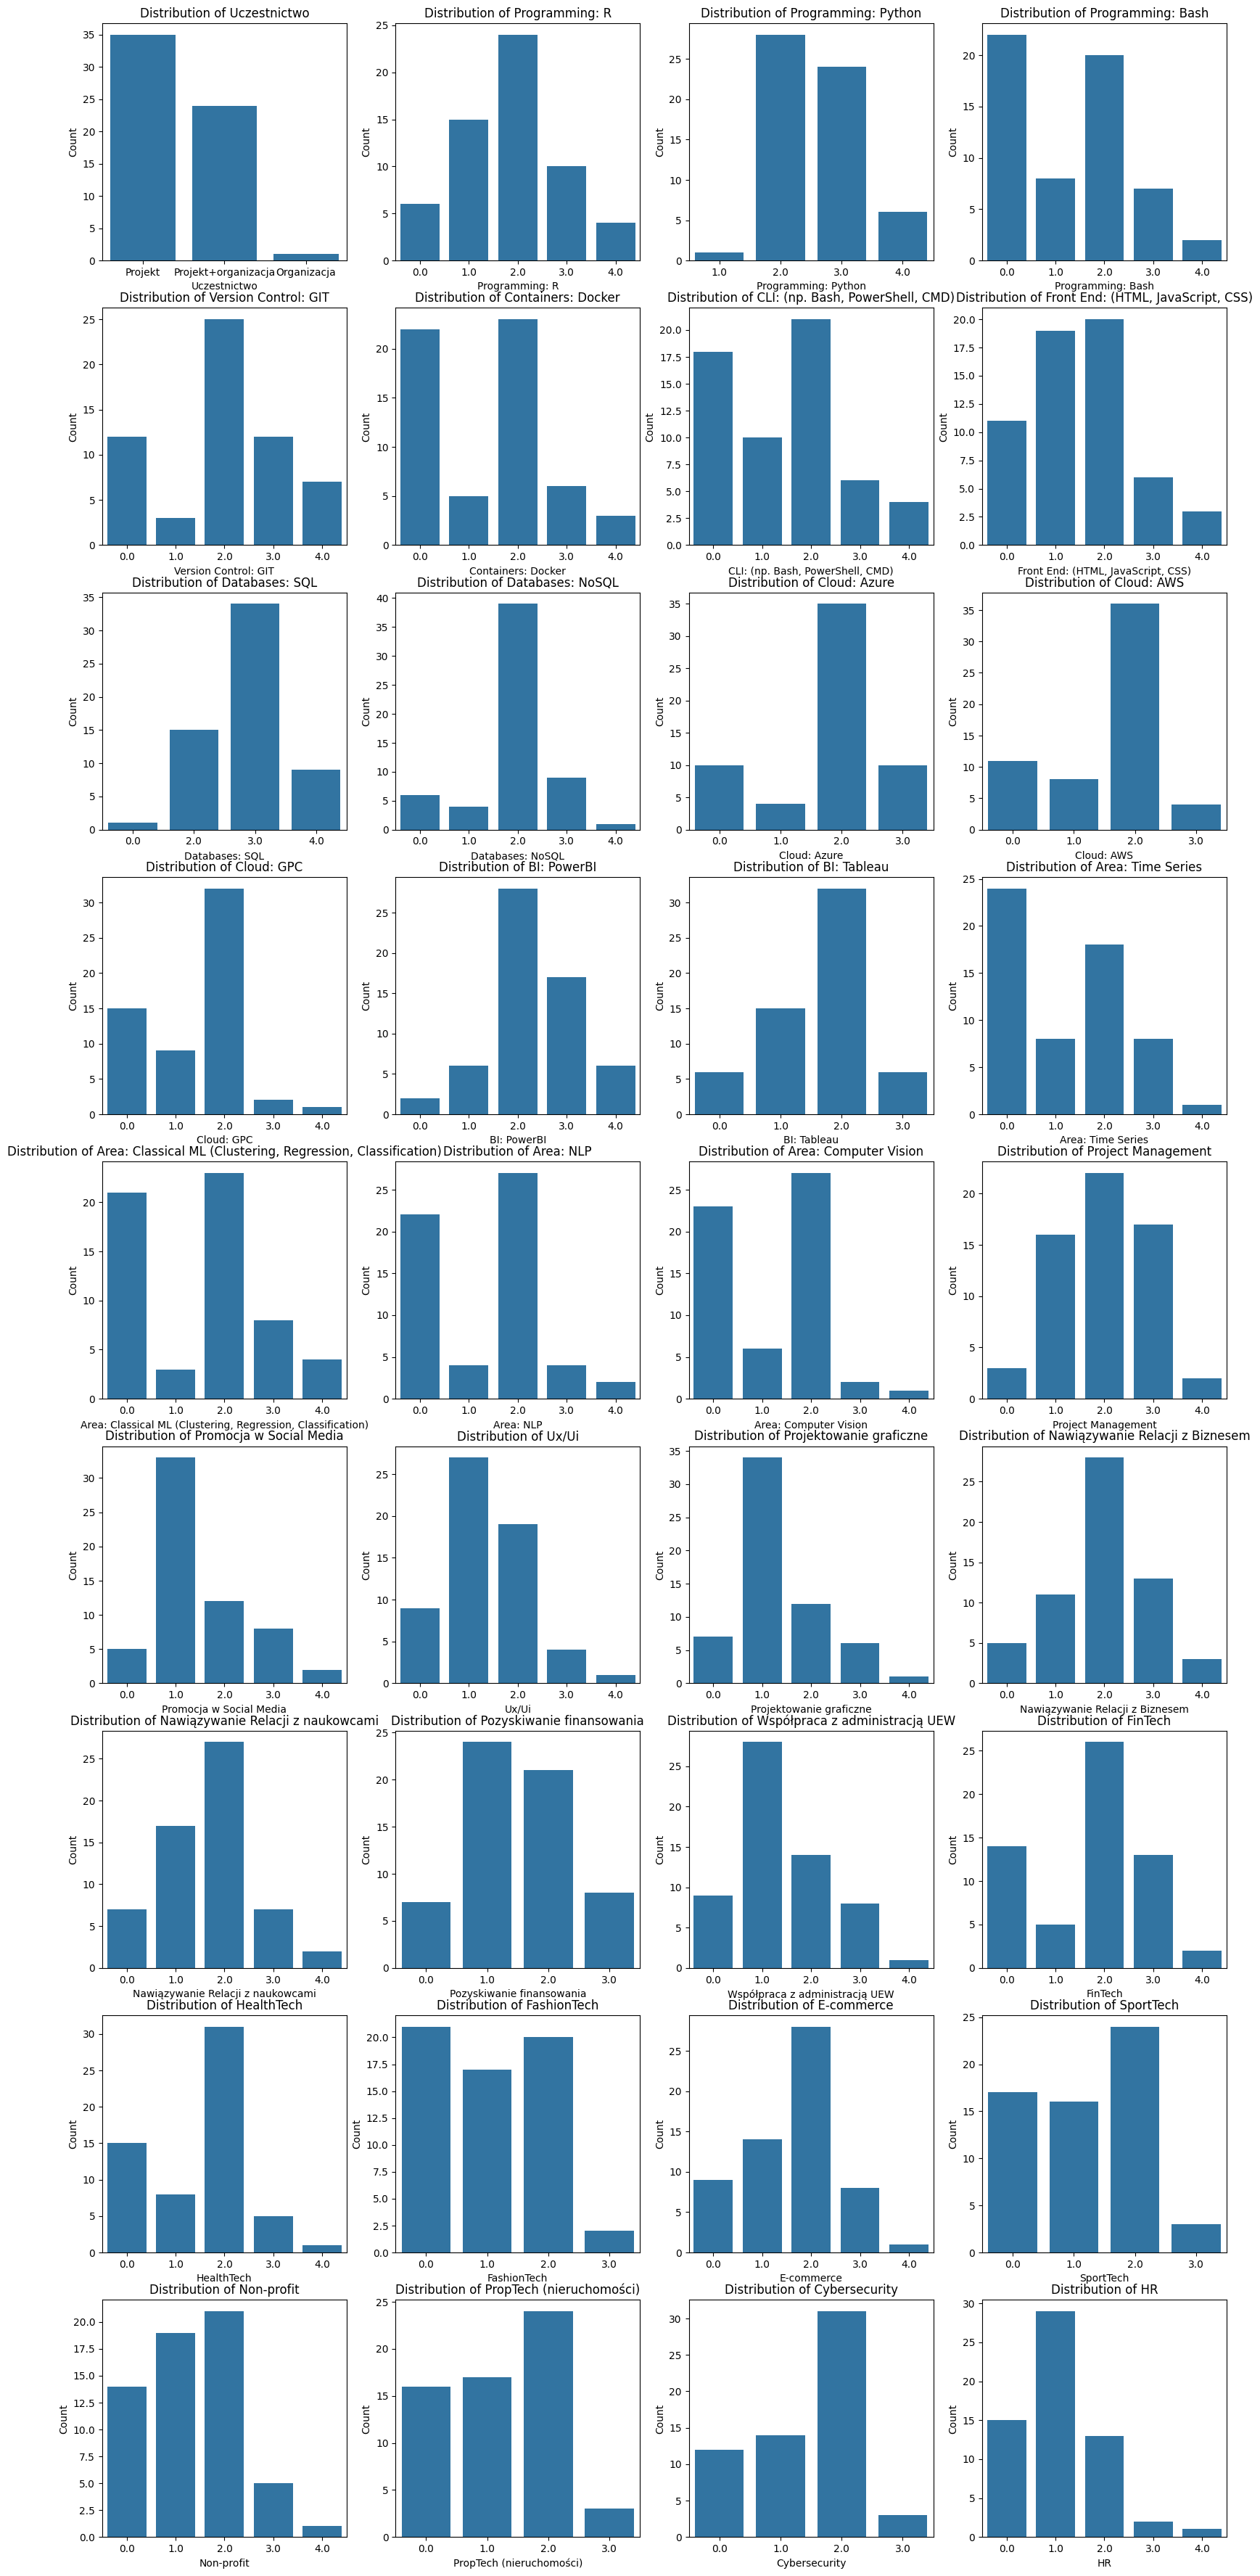

In [8]:
num_columns = 4
num_rows = (len(processed_data.columns[1:]) - 1) // num_columns + 1
plt.figure(figsize=(20, 5 * num_rows))

for i, column in enumerate(processed_data.columns[1:]):
    plt.subplot(num_rows, num_columns, i + 1)
    value_counts = processed_data[column].value_counts()
    sns.barplot(x=value_counts.index, y=value_counts.values)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")


plt.show()


<Axes: >

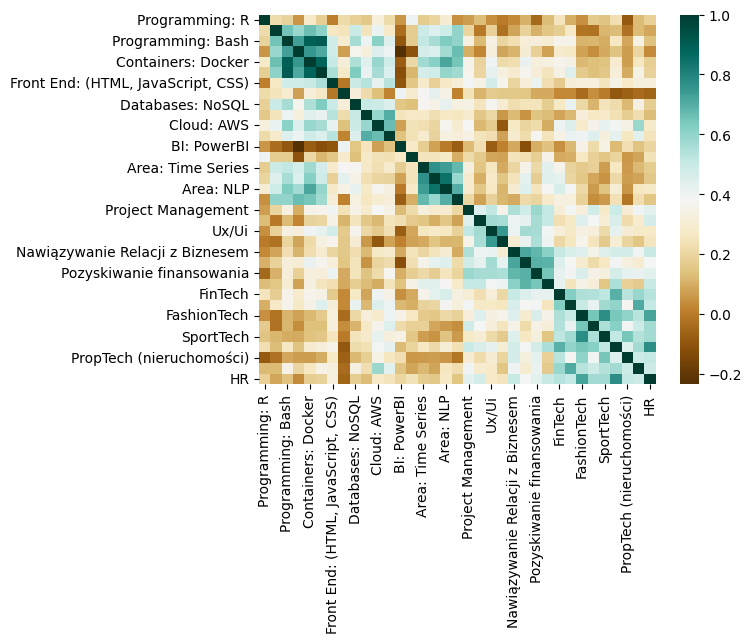

In [9]:
sns.heatmap(selected_columns.corr(),cmap='BrBG')

<Figure size 640x480 with 0 Axes>

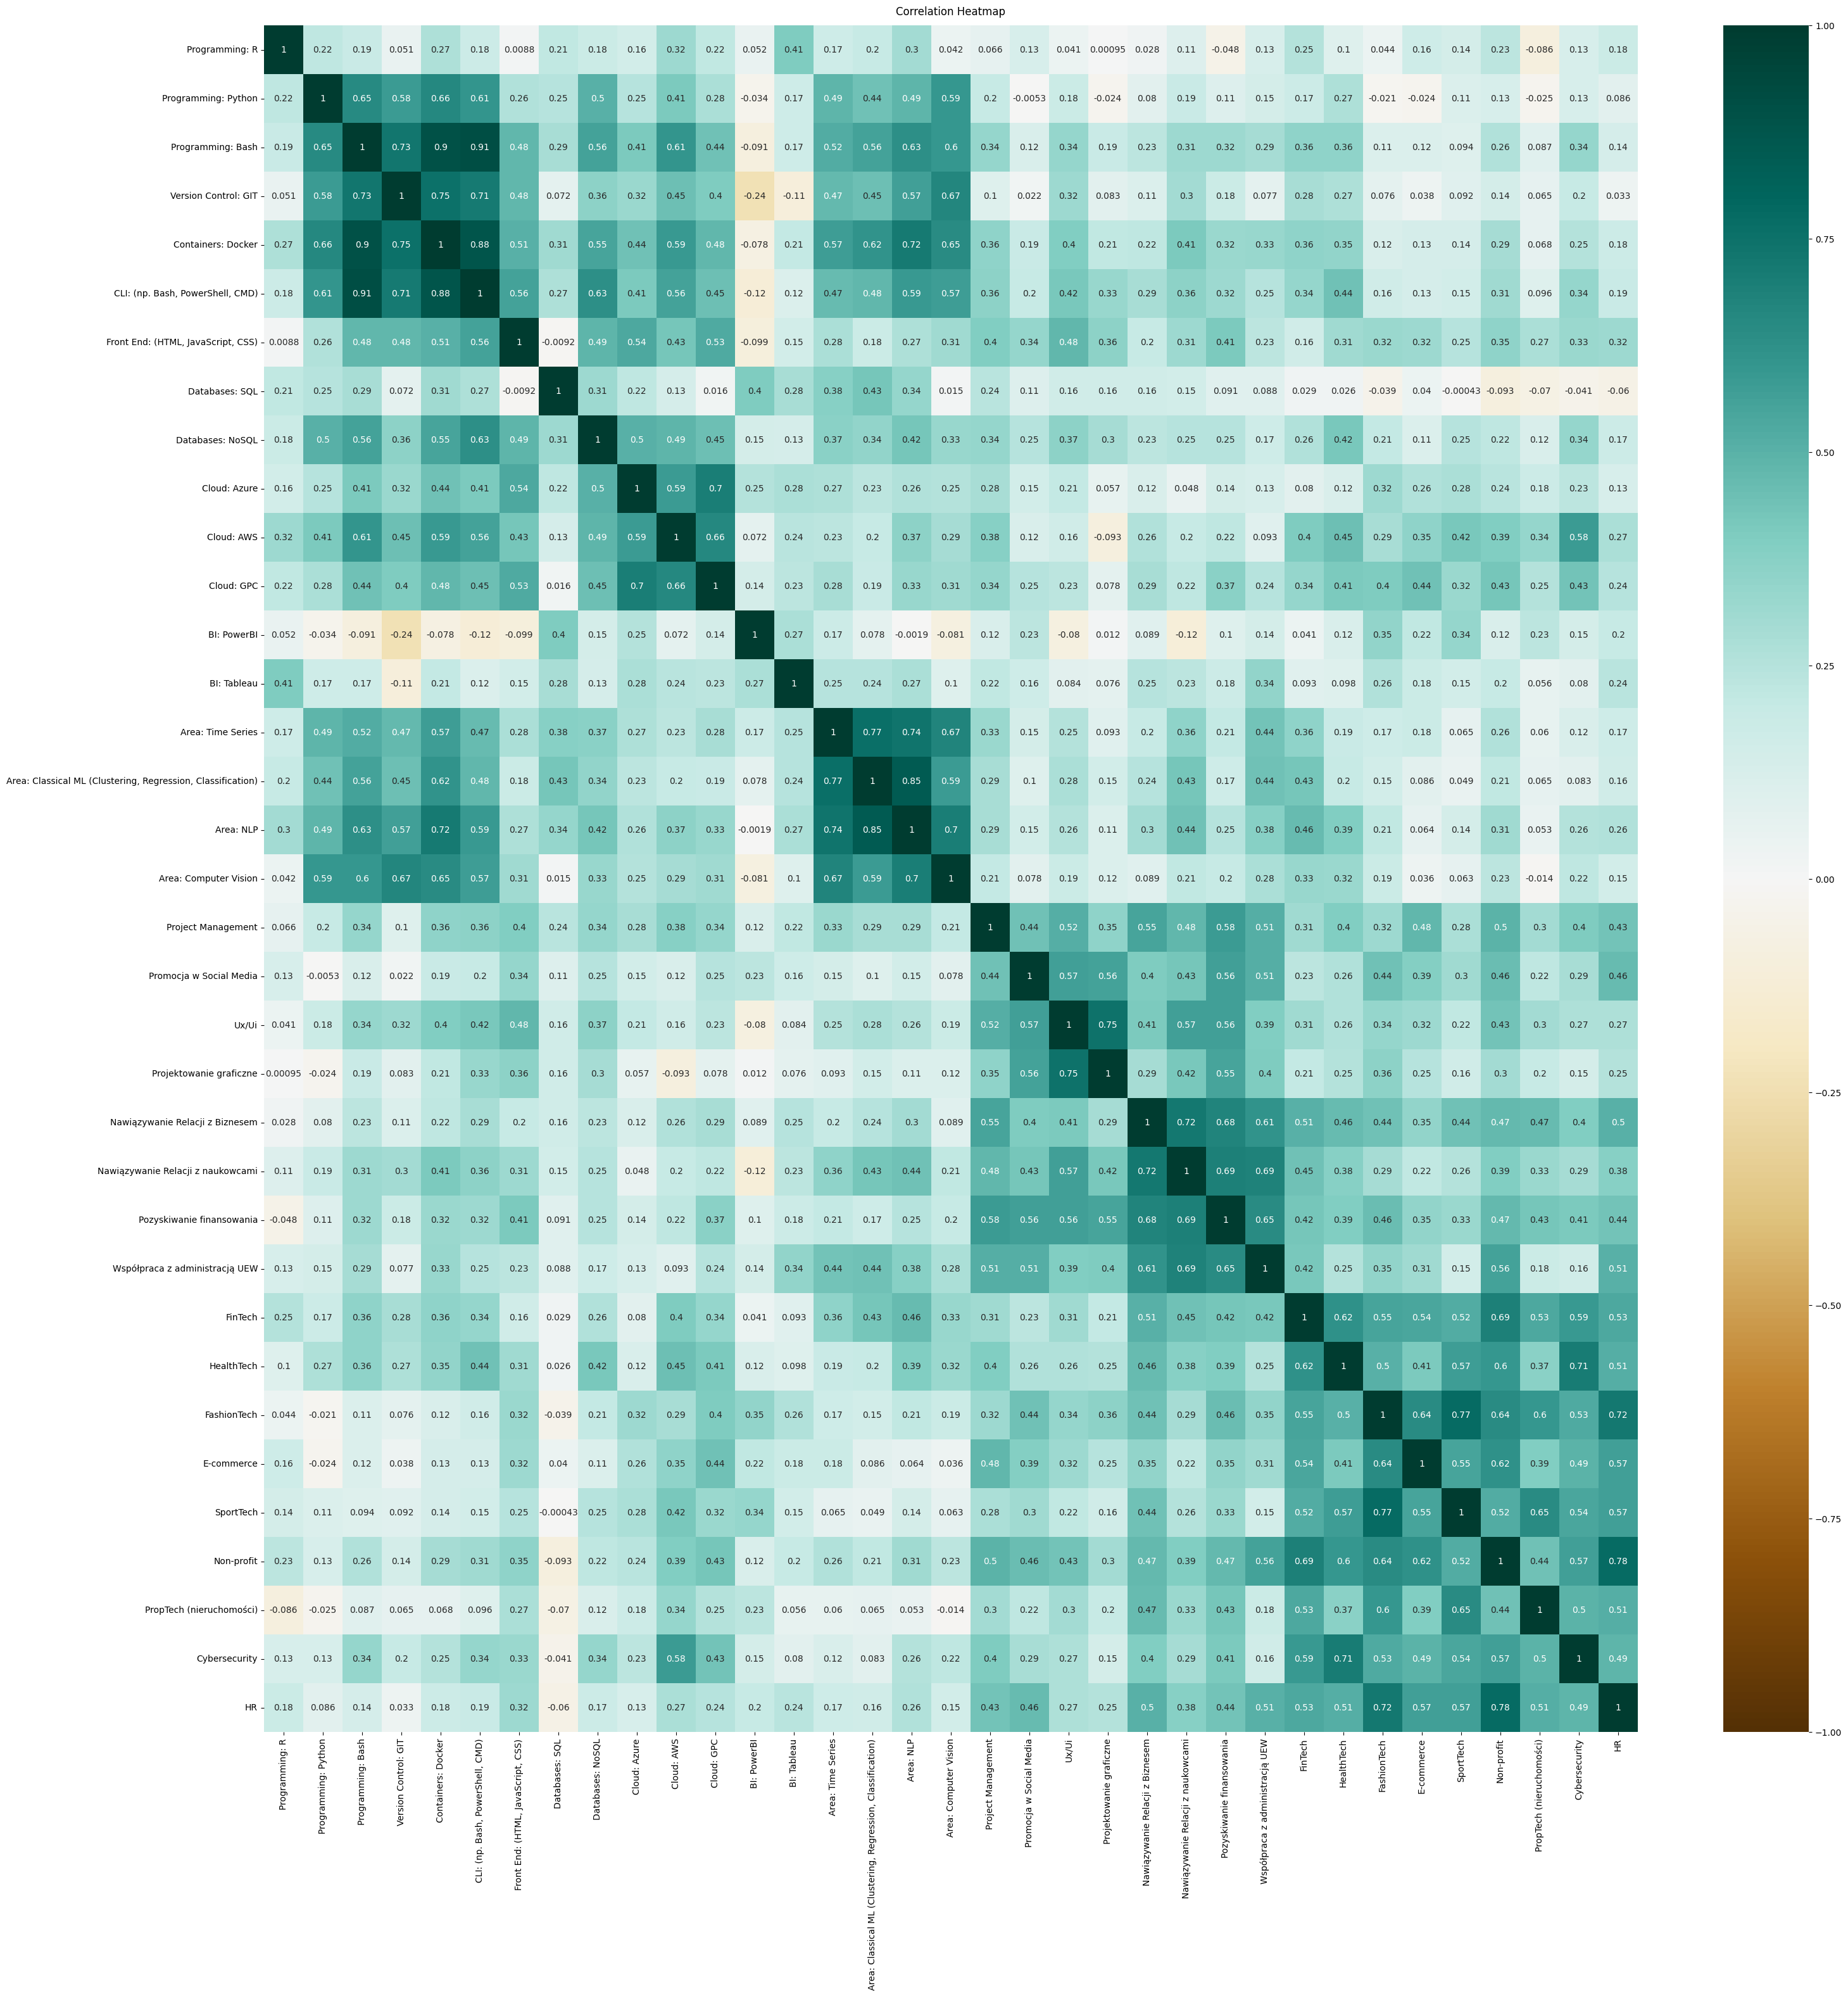

In [10]:
plt.figure()
plt.figure(figsize=(35,35))
heatmap = sns.heatmap(selected_columns.corr(), vmin=-1, vmax=1, annot=True,cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.savefig('../figures/03_CorrelationHeatmap.png', dpi=300,bbox_inches='tight')
plt.show()

<Figure size 640x480 with 0 Axes>

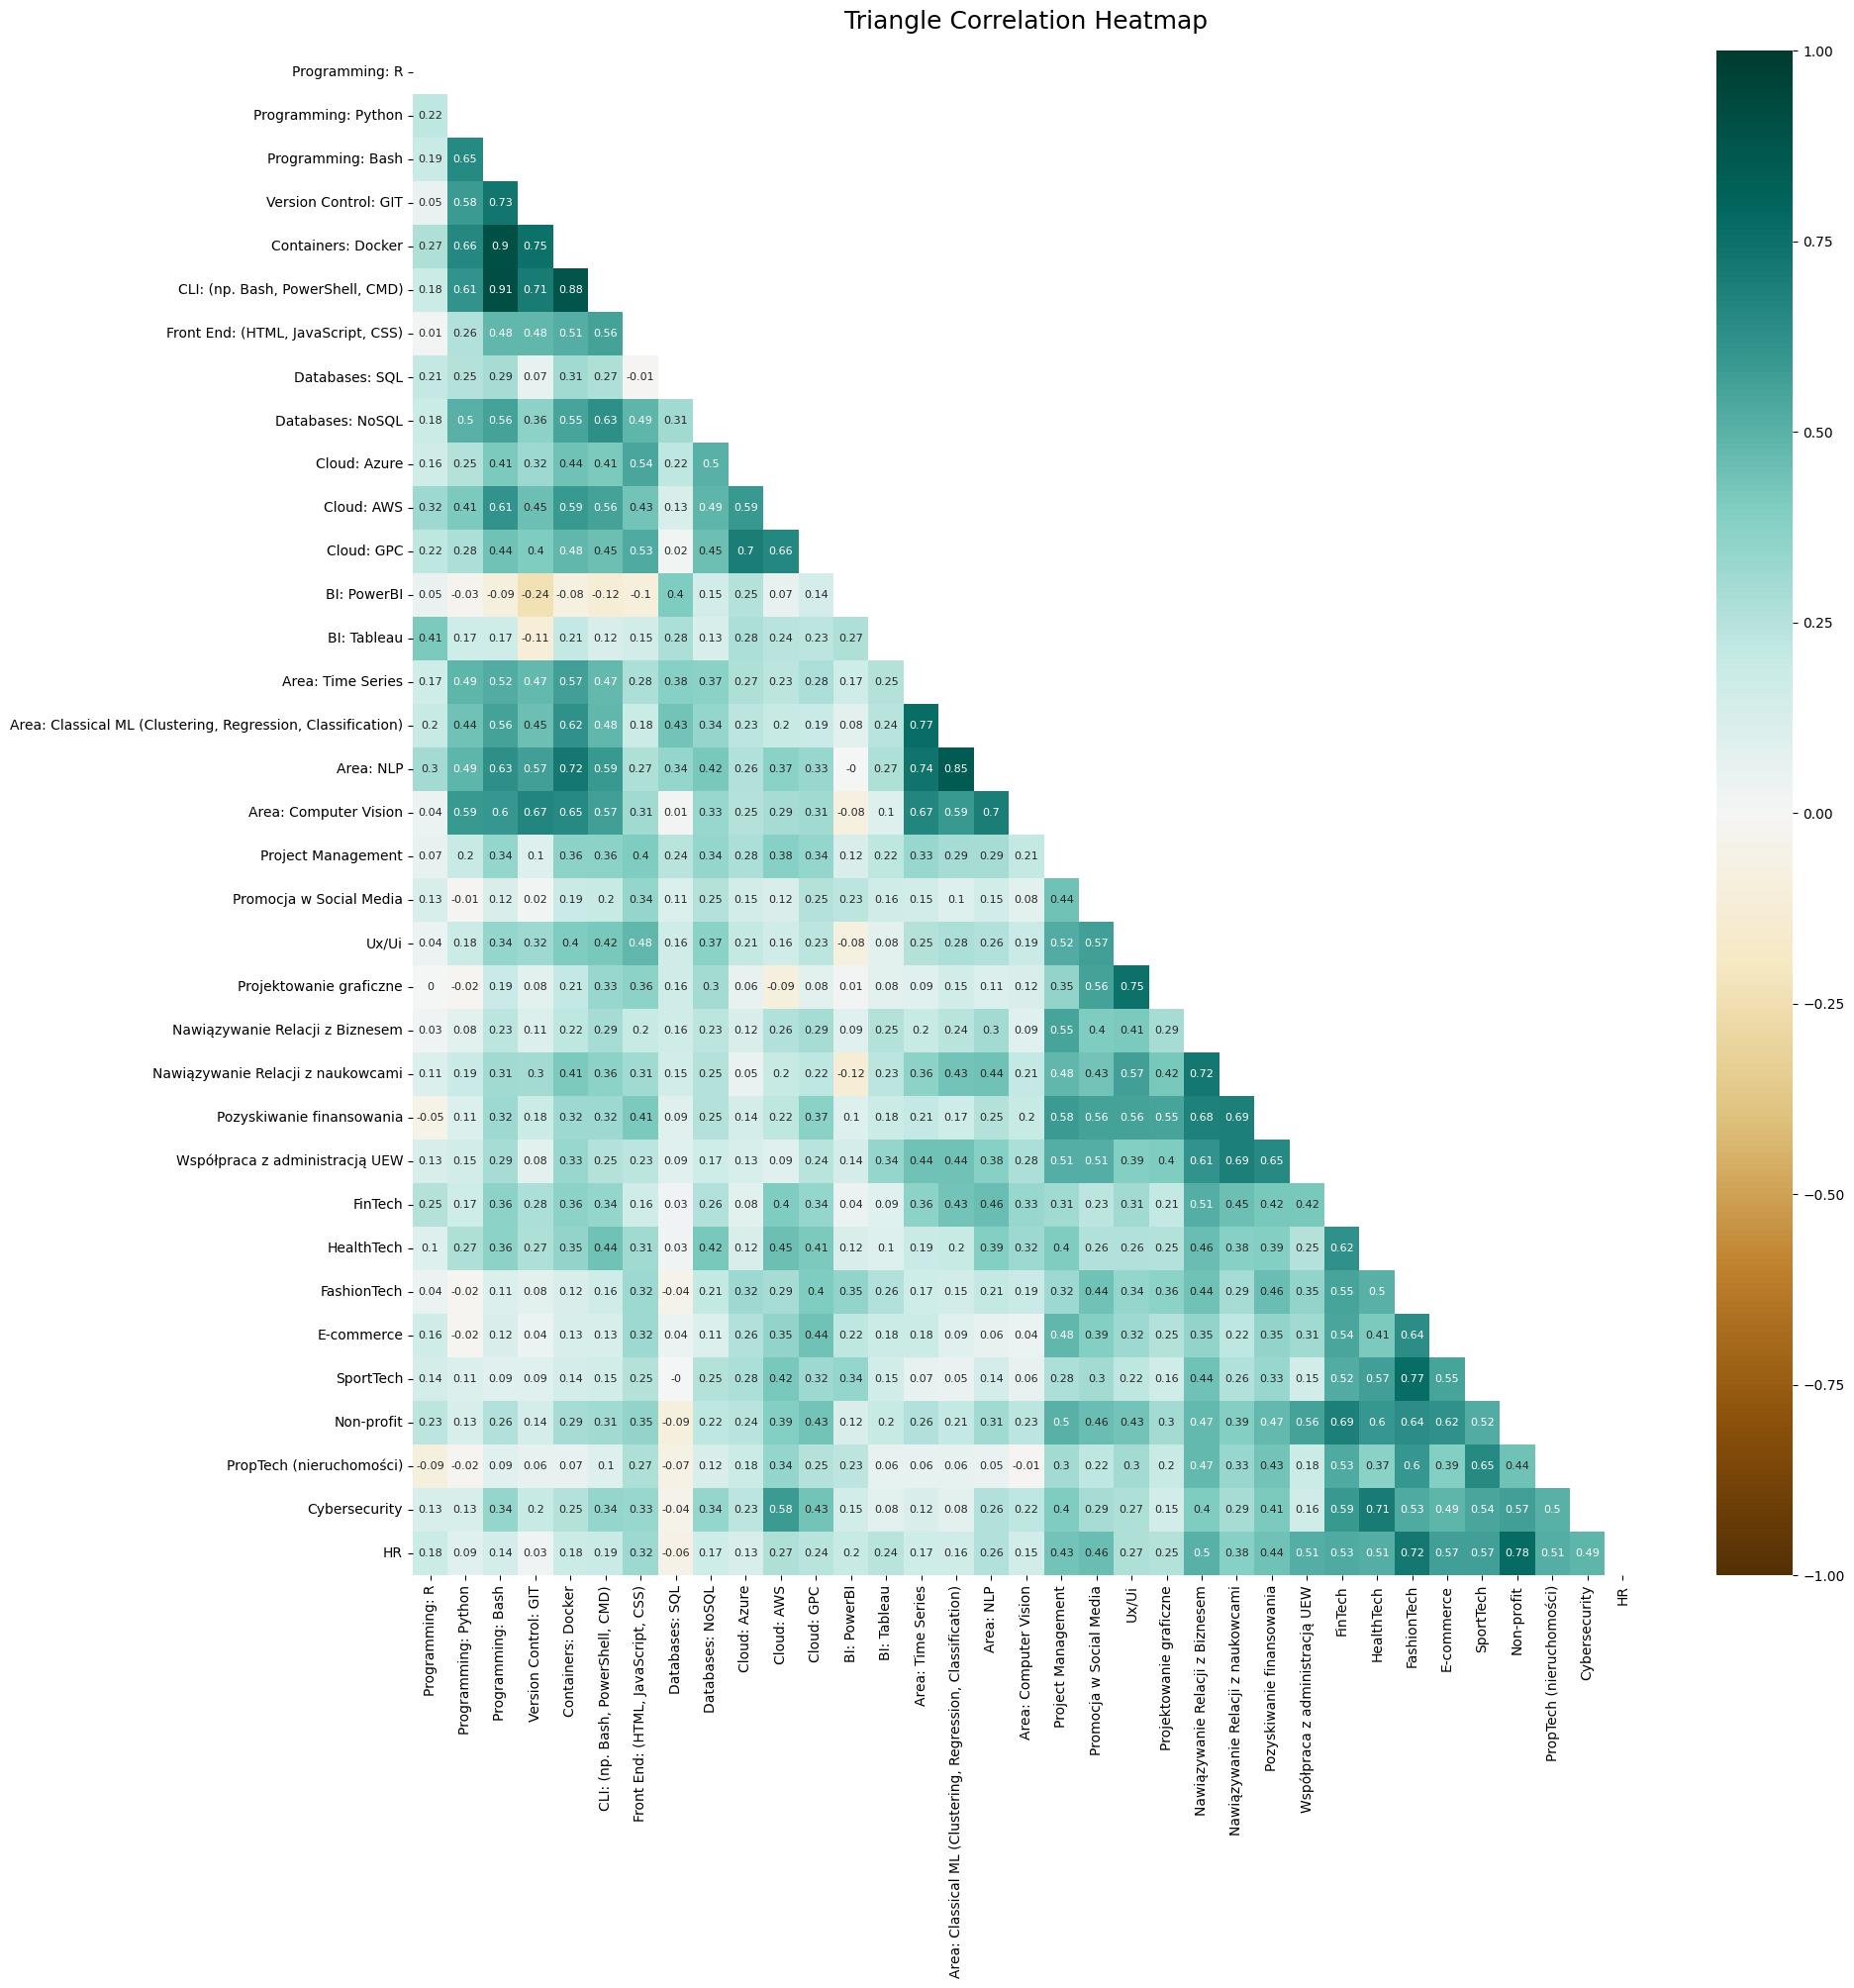

In [11]:
corr_matrix = selected_columns.corr()
corr_matrix=corr_matrix.round(2)

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure()
plt.figure(figsize=(20, 20))
heatmap = sns.heatmap(corr_matrix, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG', annot_kws={"size": 8})
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize': 18}, pad=16)
plt.savefig('../figures/03_TriangleCorrelationHeatmap.png', dpi=300,bbox_inches='tight')
plt.show()

In [12]:
app = Dash(__name__)

# Układ interfejsu
app.layout = html.Div([
    html.H4('Features Correlating'),
    dcc.Dropdown(
        id="dropdown",
        options=[{'label': col, 'value': col} for col in selected_columns.columns],
        value="Programming: R",
        clearable=False,
    ),
    html.Img(id='heatmap')
])

# Funkcja obsługująca aktualizację heatmapy
@app.callback(
    Output('heatmap', 'src'),
    Input('dropdown', 'value')
)
def update_heatmap(selected_column):
    plt.figure(figsize=(15, 12))
    
    # Ustalenie danych do heatmapy
    corr_data = selected_columns.corr()[[selected_column]].sort_values(by=selected_column, ascending=False)
    top_6_corr = corr_data.head(6)
    
    heatmap = sns.heatmap(top_6_corr, vmin=-1, vmax=1, annot=True, cmap='BrBG')
    heatmap.set_title('Top 6 Features Correlating', fontdict={'fontsize': 18}, pad=16)
    
    plt.yticks(rotation=45)
    
    # Zapisz obraz do bufora
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)
    
    # Konwertuj do kodu base64
    encoded = base64.b64encode(buf.read()).decode('utf-8')
    
    # Zwróć źródło obrazu
    return f'data:image/png;base64,{encoded}'

# Uruchomienie serwera
if __name__ == '__main__':
    app.run_server(debug=True)